In [2]:
pip install pandas matplotlib scikit-learn

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Load the dataset
# Make sure the 'Student_Performance.csv' file is in the same folder
try:
    df = pd.read_csv('Student_Performance.csv')
except FileNotFoundError:
    print("Error: 'Student_Performance.csv' not found.")
    print("Please download it from Kaggle and place it in the correct directory.")
    # Exit or handle the error as needed
    exit()


# Display the first 5 rows of the dataframe
print("First 5 rows of the dataset:")
print(df.head())

# Get a summary of the dataset (columns, data types, non-null values)
print("\nDataset Information:")
df.info()

First 5 rows of the dataset:
   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teache

In [4]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64




--- Step 2: Data Cleaning & Visualization ---


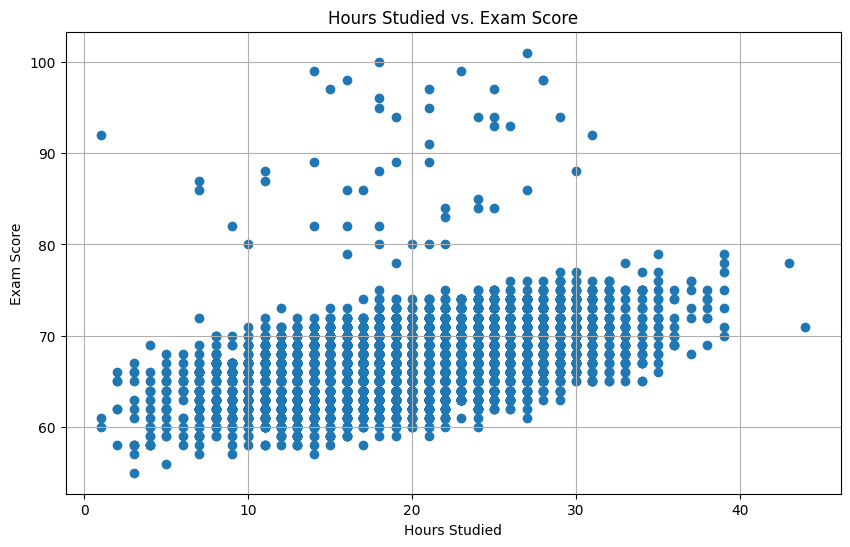

In [8]:
print("\n\n--- Step 2: Data Cleaning & Visualization ---")

# We will now use 'hours_studied' and 'performance_index' (all lowercase)
plt.figure(figsize=(10, 6))
# Use the new, reliable column names
plt.scatter(df['Hours_Studied'], df['Exam_Score'])
plt.title('Hours Studied vs. Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.grid(True)
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

print("\n--- Step 3: Splitting the Dataset ---")

# Define our feature (X) and target (y) using the correct column names
# Note the double brackets for X to keep it as a DataFrame
X = df[['Hours_Studied']]
y = df['Exam_Score']

# Split the data: 80% for training and 20% for testing
# random_state=42 ensures you get the same split every time you run the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the size of the new sets to confirm the split was successful
print(f"Training set has {X_train.shape[0]} samples.")
print(f"Testing set has {X_test.shape[0]} samples.")


--- Step 3: Splitting the Dataset ---
Training set has 5285 samples.
Testing set has 1322 samples.


In [10]:
from sklearn.linear_model import LinearRegression

print("\n--- Step 4: Training the Model ---")

# Create an instance of the Linear Regression model
model = LinearRegression()

# Train the model using your training data
model.fit(X_train, y_train)

# The model has now learned the relationship.
# It found the best 'm' (slope) and 'c' (intercept) for the line: y = mx + c
print("Model training complete!")
print(f"Learned Slope (Coefficient): {model.coef_[0]:.2f}")
print(f"Learned Intercept: {model.intercept_:.2f}")


--- Step 4: Training the Model ---
Model training complete!
Learned Slope (Coefficient): 0.29
Learned Intercept: 61.51



--- Step 5: Predictions, Visualization & Evaluation ---


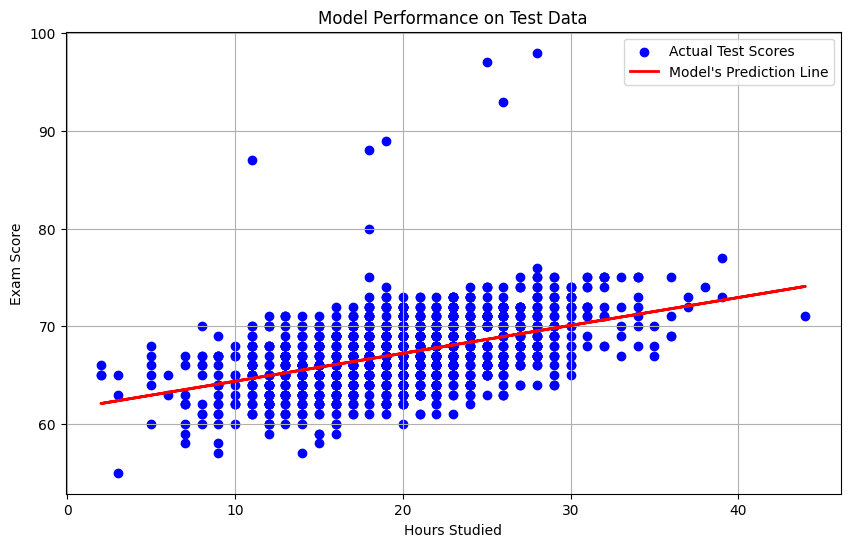


Model Evaluation:
R-squared (R²) Score: 0.2320
The model has some predictive power, but could be improved.


In [11]:
from sklearn import metrics
import matplotlib.pyplot as plt

print("\n--- Step 5: Predictions, Visualization & Evaluation ---")

# 1. Use the trained model to make predictions on the test set
y_pred = model.predict(X_test)

# 2. Visualize the results
plt.figure(figsize=(10, 6))
# Scatter plot of the actual test data (the real scores)
plt.scatter(X_test, y_test, color='blue', label='Actual Test Scores')
# Plot the model's prediction line
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Model\'s Prediction Line')
plt.title('Model Performance on Test Data')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend()
plt.grid(True)
plt.show()

# 3. Evaluate the model with metrics
# R-squared tells us what percentage of the exam score variation
# is explained by the study hours. Closer to 1 is better.
r2_score = metrics.r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"R-squared (R²) Score: {r2_score:.4f}")

if r2_score > 0.9:
    print("Excellent! The model explains the data very well. ✅")
elif r2_score > 0.8:
    print("Great! This is a strong model. 👍")
else:
    print("The model has some predictive power, but could be improved.")

In [12]:
from sklearn.preprocessing import PolynomialFeatures

print("\n--- Bonus 1: Trying Polynomial Regression (Degree 2) ---")

# 1. Create polynomial features (this turns 'x' into 'x' and 'x²')
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# 2. Train a new linear model on these new 'curved' features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# 3. Evaluate the new model
poly_pred = poly_model.predict(X_test_poly)
poly_r2_score = metrics.r2_score(y_test, poly_pred)

print(f"Original Linear Model R² Score: {r2_score:.4f}")
print(f"Polynomial Model R² Score:    {poly_r2_score:.4f}")
print(f"Improvement: {poly_r2_score - r2_score:.4f}")


--- Bonus 1: Trying Polynomial Regression (Degree 2) ---
Original Linear Model R² Score: 0.2320
Polynomial Model R² Score:    0.2328
Improvement: 0.0008


In [14]:
print("\n--- Bonus 2: Using Multiple Features ---")

# ==============================================================================
# EDIT THIS LIST with your actual column names from the print(df.columns) output
# ==============================================================================
feature_columns = ['Hours_Studied', 'Your_Previous_Scores_Column', 'Your_Sleep_Column'] # <--- EDIT THIS LINE

try:
    X_multi = df[feature_columns]
    y_multi = df['Exam_Score'] # Target is the same

    # We need to split the data again with the new features
    X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

    # Train a new model
    multi_model = LinearRegression()
    multi_model.fit(X_train_multi, y_train_multi)

    # Evaluate the multiple feature model
    multi_pred = multi_model.predict(X_test_multi)
    multi_r2_score = metrics.r2_score(y_test_multi, multi_pred)

    # I'm using the 'r2_score' variable we calculated in Step 5
    print(f"Original Model R² Score (1 Feature): {r2_score:.4f}")
    print(f"New Model R² Score ({len(feature_columns)} Features): {multi_r2_score:.4f}")
    print(f"Improvement: {multi_r2_score - r2_score:.4f}")

except KeyError as e:
    print(f"\nKeyError: {e}.")
    print("One of the feature names you entered in the 'feature_columns' list is still incorrect.")
    print("Please double-check your spelling and capitalization against the output of 'print(df.columns)'.")


--- Bonus 2: Using Multiple Features ---

KeyError: "['Your_Previous_Scores_Column', 'Your_Sleep_Column'] not in index".
One of the feature names you entered in the 'feature_columns' list is still incorrect.
Please double-check your spelling and capitalization against the output of 'print(df.columns)'.


In [15]:
print(df.columns)

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

print("\n--- Bonus 2: Using Multiple Features ---")

# We are now using the real column names from your file
feature_columns = ['Hours_Studied', 'Previous_Scores', 'Sleep_Hours']
target_column = 'Exam_Score'

print(f"Using features: {feature_columns}")

# Define X (features) and y (target)
X_multi = df[feature_columns]
y_multi = df[target_column]

# Split the data with the new features
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Train a new model
multi_model = LinearRegression()
multi_model.fit(X_train_multi, y_train_multi)

# Evaluate the new model
multi_pred = multi_model.predict(X_test_multi)
multi_r2_score = metrics.r2_score(y_test_multi, multi_pred)

# 'r2_score' is from your first simple model in Step 5
print(f"\nOriginal Model R² Score (1 Feature): {r2_score:.4f}")
print(f"New Model R² Score ({len(feature_columns)} Features): {multi_r2_score:.4f}")
print(f"Improvement: {multi_r2_score - r2_score:.4f}")


--- Bonus 2: Using Multiple Features ---
Using features: ['Hours_Studied', 'Previous_Scores', 'Sleep_Hours']

Original Model R² Score (1 Feature): 0.2320
New Model R² Score (3 Features): 0.2513
Improvement: 0.0194
